1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt



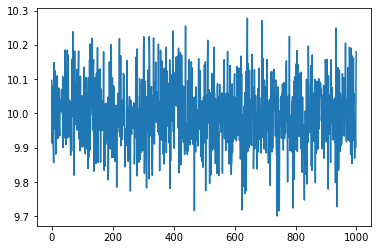

In [2]:
N = 1000
mean = 10
sigma = 0.1
x = sigma * npr.randn(N) + mean
xx = np.arange(1000)
plt.plot(xx,x)
plt.show()

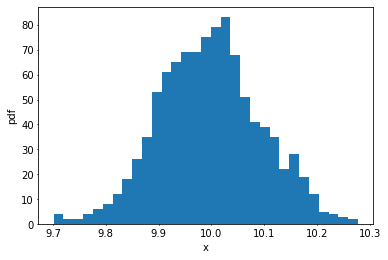

In [3]:
fig, hx = plt.subplots()
hx.hist(x, bins=int(np.sqrt(N)))
hx.set_xlabel('x')
hx.set_ylabel('pdf')
hx.tick_params(which='major', length=1, width=1.0)


In [1]:
bin_counts, bin_edges, _ = plt.hist(x, bins=int(np.sqrt(N)))
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

y_error = np.sqrt(bin_counts)

plt.errorbar(x=bin_centres, y=bin_counts, yerr=y_error, fmt='o')

plt.show()

NameError: name 'plt' is not defined

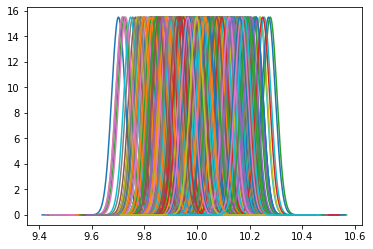

In [5]:
import scipy
from scipy.stats import norm
std = 1.06*np.std(x)*N**(-1/5)

gaussians = []
for i in x:
    t = np.linspace(i-3*np.std(x), i+3*np.std(x), 300)
    gauss = norm.pdf(t,i,std)
    plt.plot(t,gauss)
    gaussians.append(gauss)


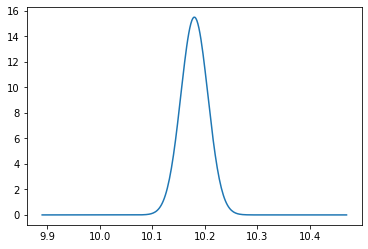

In [6]:
gaussians = np.array(gaussians)

sumg = gaussians.sum(axis=0)
Z = scipy.integrate.trapz(sumg,t,0.001)
plt.plot(t,sumg/Z)




2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [7]:
def g2d(m1,s1,N1,m2,s2,N2):
    g1x = s1 * npr.randn(N1) + m1[0]
    g1y = s1 * npr.randn(N1) + m1[1]
    g2x = s2 * npr.randn(N2) + m2[0]
    g2y = s2 * npr.randn(N2) + m2[1]
    return g1x, g2x, g1y,g2y

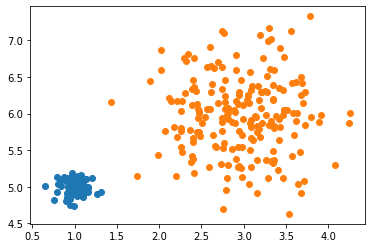

In [8]:
g1x, g2x, g1y, g2y = g2d([1,5],0.1,100,[3,6],0.5,200)

plt.scatter(g1x,g1y,marker='o')
plt.scatter(g2x,g2y,marker='o')
plt.show()

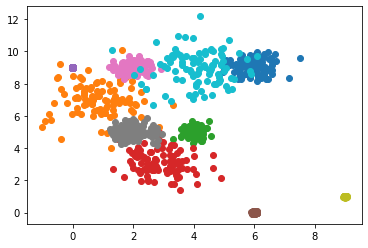

In [9]:
def g2dn(m, s, N, cat):
    for i in range(cat):
        g1x = s[i] * npr.randn(N[i]) + m[0,i]
        g1y = s[i] * npr.randn(N[i]) + m[1,i]
        plt.scatter(g1x,g1y,marker='o')
    plt.show()


cat = 10
N = np.array([100 for i in range(cat)])
m = np.array([[npr.randint(0,10) for i in range(cat)] for i in range(cat)])
s = np.array( [npr.random() for i in range(cat)] )

g2dn(m, s, N, cat)
        
    

In [10]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [11]:
import pandas as pd 
vec = np.load('residuals_261.npy', allow_pickle=True)
df = pd.DataFrame( vec.item() )

df2 = df[ abs(df['residuals'])<2 ]
linr = scipy.stats.linregress(df2['distances'], df2['residuals'])
linr

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789)

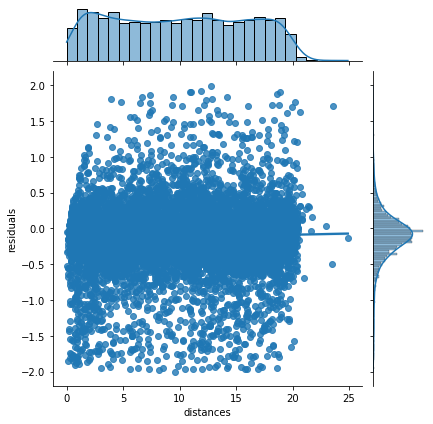

In [12]:
import seaborn as sns
sea = sns.jointplot(data = df2, x="distances", y="residuals", kind="reg")

In [13]:
x = np.linspace(0,20,int(np.sqrt(len(df['residuals']))))
x

array([ 0.        ,  0.19230769,  0.38461538,  0.57692308,  0.76923077,
        0.96153846,  1.15384615,  1.34615385,  1.53846154,  1.73076923,
        1.92307692,  2.11538462,  2.30769231,  2.5       ,  2.69230769,
        2.88461538,  3.07692308,  3.26923077,  3.46153846,  3.65384615,
        3.84615385,  4.03846154,  4.23076923,  4.42307692,  4.61538462,
        4.80769231,  5.        ,  5.19230769,  5.38461538,  5.57692308,
        5.76923077,  5.96153846,  6.15384615,  6.34615385,  6.53846154,
        6.73076923,  6.92307692,  7.11538462,  7.30769231,  7.5       ,
        7.69230769,  7.88461538,  8.07692308,  8.26923077,  8.46153846,
        8.65384615,  8.84615385,  9.03846154,  9.23076923,  9.42307692,
        9.61538462,  9.80769231, 10.        , 10.19230769, 10.38461538,
       10.57692308, 10.76923077, 10.96153846, 11.15384615, 11.34615385,
       11.53846154, 11.73076923, 11.92307692, 12.11538462, 12.30769231,
       12.5       , 12.69230769, 12.88461538, 13.07692308, 13.26

In [14]:
y = [ np.mean( df2[ (df2['distances']>x[i]) & (df2['distances']<x[i+1]) ]['residuals'] ) for i in range(len(x)-1) ]
stdy = [ np.std( df2[ (df2['distances']>x[i]) & (df2['distances']<x[i+1]) ]['residuals'] ) for i in range(len(x)-1) ]

#print(y, '\n', stdy)
x = np.delete(x,-1)

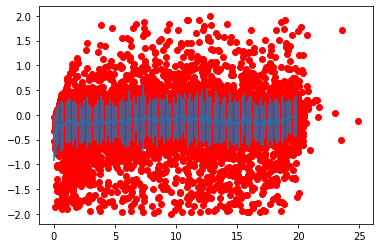

In [25]:
plt.errorbar(x,y,stdy)
plt.scatter(df2['distances'],df2['residuals'], marker='o', color='red')
plt.show()